In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D,Input
import matplotlib.pylab as plt
import numpy as np
from keras.layers import Convolution2D

C:\Users\sonia\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

num_classes = 10

# input image dimensions
img_rows, img_cols = 32, 32
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1,img_rows, img_cols,3))
x_test = x_test.reshape((-1,img_rows, img_cols,3))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


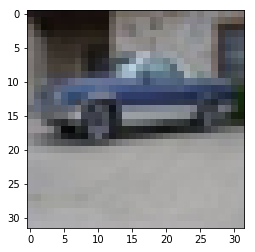

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
num = 10000
plt.imshow(x_train[num])
plt.show()
print (y_train[num])

In [4]:
input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [5]:
epochs = 10 #整批數據訓練次數
batch_size = 128 #一次訓練張數

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 226s 5ms/step - loss: 1.7265 - acc: 0.3782 - val_loss: 1.5106 - val_acc: 0.5023
Epoch 2/10
50000/50000 [==============================] - 206s 4ms/step - loss: 1.3297 - acc: 0.5252 - val_loss: 1.2917 - val_acc: 0.5585
Epoch 3/10
50000/50000 [==============================] - 208s 4ms/step - loss: 1.1621 - acc: 0.5890 - val_loss: 1.1581 - val_acc: 0.6129
Epoch 4/10
50000/50000 [==============================] - 207s 4ms/step - loss: 1.0551 - acc: 0.6257 - val_loss: 1.1245 - val_acc: 0.6282
Epoch 5/10
50000/50000 [==============================] - 209s 4ms/step - loss: 0.9679 - acc: 0.6602 - val_loss: 1.0293 - val_acc: 0.6662
Epoch 6/10
50000/50000 [==============================] - 207s 4ms/step - loss: 0.8954 - acc: 0.6851 - val_loss: 0.9422 - val_acc: 0.6980
Epoch 7/10
50000/50000 [==============================] - 207s 4ms/step - loss: 0.8248 - acc: 0.7115 - val_loss: 0.9053 - 

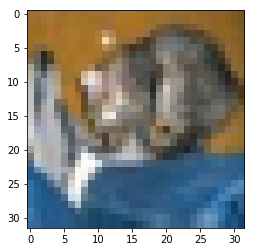

output [0.01116692 0.01744041 0.01534062 0.34421954 0.03386886 0.44419953
 0.05640206 0.03016895 0.03689428 0.01029882]
result [5]
truth [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


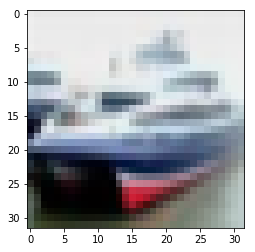

output [1.1178507e-02 1.0174038e-01 3.2748280e-06 1.2202998e-05 2.3190826e-06
 1.3735392e-06 3.2781963e-06 2.6804487e-06 8.8569456e-01 1.3614390e-03]
result [8]
truth [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


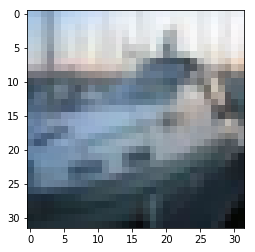

output [0.16561522 0.02670285 0.00451882 0.00733635 0.00665376 0.00157821
 0.00113363 0.00649531 0.75765    0.02231583]
result [8]
truth [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


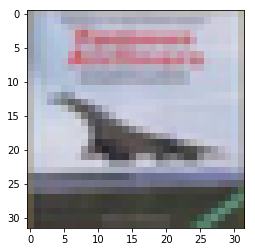

output [5.7815051e-01 7.5497359e-02 1.4833495e-02 1.8636895e-03 8.9802938e-03
 1.0988341e-04 7.3519041e-04 2.9309717e-04 3.1527472e-01 4.2616953e-03]
result [0]
truth [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


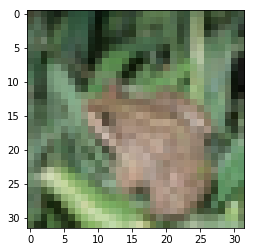

output [6.0118113e-05 2.7263098e-04 7.8808181e-02 2.2019960e-01 1.6808496e-01
 1.5022100e-02 5.1559198e-01 4.1984758e-04 1.3256494e-03 2.1486245e-04]
result [6]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


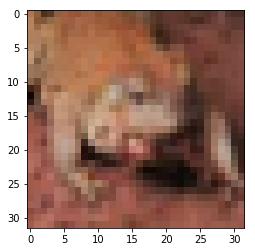

output [0.00446801 0.00366444 0.02466583 0.03643948 0.05455714 0.04952247
 0.80924356 0.00695164 0.00632156 0.00416585]
result [6]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


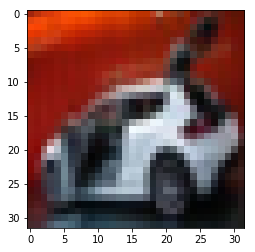

output [9.8987380e-03 7.0359719e-01 6.3186925e-04 1.1697072e-02 3.1971867e-04
 1.4081230e-02 1.1859068e-03 5.8874316e-03 6.5008673e-04 2.5205070e-01]
result [1]
truth [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


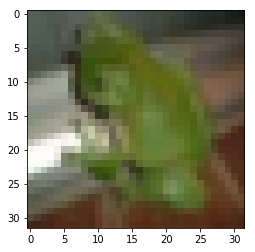

output [0.03463078 0.00229076 0.18979056 0.04656254 0.08638764 0.00803425
 0.61630577 0.00420034 0.00432987 0.00746757]
result [6]
truth [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


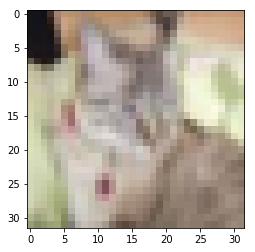

output [0.01195303 0.00081081 0.05122553 0.48927546 0.14170486 0.18369396
 0.04464598 0.07377928 0.00163809 0.001273  ]
result [3]
truth [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


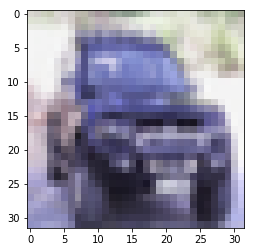

output [1.42421271e-03 8.83836687e-01 3.18837701e-04 2.72174890e-04
 3.85626307e-04 7.57749585e-05 8.09096033e-04 4.51410924e-05
 1.27726495e-02 1.00059971e-01]
result [1]
truth [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
import numpy as np
test_data = x_test[0:10] #第1-10比測試資料
truth = y_test[0:10]
test_result=model.predict(test_data)
for i in range (test_result.shape[0]):
    plt.imshow(test_data[i])
    plt.show()
    print ('output',test_result[i])
    print ('result',np.where(test_result[i]==test_result[i].max())[0])
    print ('truth',truth[i])

In [7]:
model.save('my_model.h5')